In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.
data=pd.read_csv('Melbourne_housing_extra_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


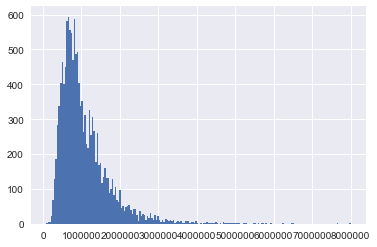

In [4]:
#plotting the price
%matplotlib inline
data.Price.hist(bins=200)

In [5]:
#grouping data by selecting Features - Bias Features here
data['date']=pd.to_datetime(data.Date)
data['year']=data.date.dt.year
data['month']=data.date.dt.year
data['day']=data.date.dt.year
data['weekday']=data.date.dt.dayofweek
prices_df=data.groupby(['Suburb','year','Type','Rooms','Bathroom','Car'],as_index=False).Price.median()
prices_df.columns=['Suburb','year','Type','Rooms','Bathroom','Car','median_price']
prices_df.head()

,Suburb,year,Type,Rooms,Bathroom,Car,median_price
0,Abbotsford,2016,h,2,1.0,0.0,1035000.0
1,Abbotsford,2016,h,2,1.0,1.0,1101250.0
2,Abbotsford,2016,h,2,1.0,2.0,1310000.0
3,Abbotsford,2016,h,2,2.0,1.0,1100000.0
4,Abbotsford,2016,h,2,2.0,2.0,1135000.0


In [6]:
#merge the Grouped data back into the original data to find out Which sale > above median price 
data=data.merge(prices_df,on=['Suburb','year','Type','Rooms','Bathroom','Car'])
data['Sold_Above_Median']=0
data.loc[data.Price>data.median_price,'Sold_Above_Median']=1
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Longtitude,Regionname,Propertycount,date,year,month,day,weekday,median_price,Sold_Above_Median
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,144.9958,Northern Metropolitan,4019,2016-03-09,2016,2016,2016,2,1101250.0,0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,144.9984,Northern Metropolitan,4019,2016-03-12,2016,2016,2016,5,1101250.0,1
2,Abbotsford,2 Rich St,2,h,NaN,SP,Biggin,10/12/2016,2.5,3067,...,144.9972,Northern Metropolitan,4019,2016-10-12,2016,2016,2016,2,1101250.0,0
3,Abbotsford,45 William St,2,h,1172500.0,S,Biggin,13/08/2016,2.5,3067,...,144.9973,Northern Metropolitan,4019,2016-08-13,2016,2016,2016,5,1101250.0,1
4,Abbotsford,42 Valiant St,2,h,890000.0,S,Biggin,17/09/2016,2.5,3067,...,145.0004,Northern Metropolitan,4019,2016-09-17,2016,2016,2016,5,1101250.0,0


In [7]:
#finding Max Distance to CBD?
data['Distance'].describe()

count    13625.000000
mean         9.118811
std          4.783334
min          0.000000
25%          5.800000
50%          8.800000
75%         11.700000
max         47.400000
Name: Distance, dtype: float64

In [8]:
bins=[0,5,10,15,20]
import numpy as np
data['distance_bins']=np.digitize(data.Distance,bins)
data.distance_bins.value_counts()

2    5698
3    4592
1    2550
4     441
5     344
Name: distance_bins, dtype: int64

In [9]:
df_zone=data.groupby(['year','Type','Rooms','distance_bins'],as_index=False).Price.median()
df_zone.columns=['year','Type','Rooms','distance_bins','Zone_price']
data=data.merge(df_zone,on=['year','Type','Rooms','distance_bins'])
data['Sold_Above_Zone_Median']=0
data.loc[data.Price>data.Zone_price,'Sold_Above_Zone_Median']=1

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


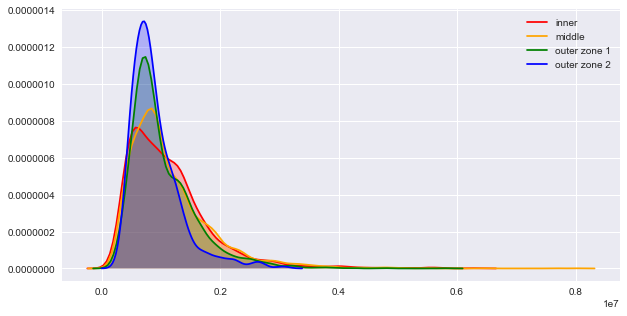

In [10]:
#Trend Zone - distance
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import seaborn as sns
melbourne_house_prices=data.loc[data.Type=='h','Price'].median()
melbourne_unit_prices=data.loc[data.Type=='u','Price'].median()

inner_zone=data[data.distance_bins==1]
middle_zone=data[data.distance_bins==2]
outer_zone=data[data.distance_bins==3]
outer2_zone=data[data.distance_bins==4]

fig1=sns.kdeplot(inner_zone.Price,color='red',shade=True)
fig2=sns.kdeplot(middle_zone.Price,color='orange',shade=True)
fig3=sns.kdeplot(outer_zone.Price,color='green',shade=True)
fig4=sns.kdeplot(outer2_zone.Price,color='blue',shade=True)

plt.legend(['inner','middle','outer zone 1','outer zone 2'])

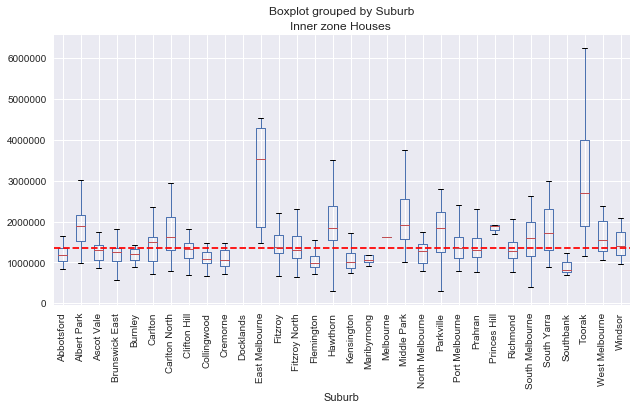

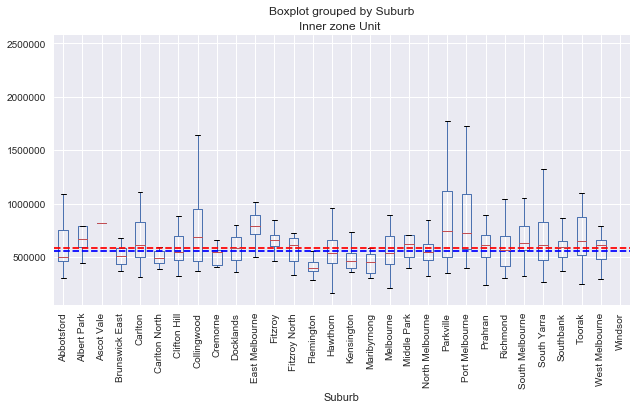

In [11]:
#So lets see sale trend for house in inner_zone
inner_zone_h=inner_zone[inner_zone.Type=='h']
median_price_houses_inner_zone=inner_zone_h.Price.median()

figr=inner_zone_h.boxplot(by='Suburb',column='Price',rot=90)
plt.axhline(y=median_price_houses_inner_zone,color='red',linestyle='dashed')
plt.title('Inner zone Houses ')

#Unit
inner_zone_u=inner_zone[inner_zone.Type=='u']
median_price_units_inner_zone=inner_zone_u.Price.median()

figr=inner_zone_u.boxplot(by='Suburb',column='Price',rot=90)
plt.axhline(y=median_price_units_inner_zone,color='red',linestyle='dashed',label='Zone unit prices')
plt.axhline(y=melbourne_unit_prices,color='blue',linestyle='dashed',label='Melbourne unit prices')

plt.title('Inner zone Unit ')

In [18]:
#buying 1BR Unit
data_1br_unit=data[(data.Type=='u')&(data.Rooms==1)]

df=data_1br_unit.groupby(['Suburb','year'],as_index=False).Price.median()
pv=df.pivot_table(index='Suburb',columns='year',values='Price')
pv['trend']='unknown'
pv.loc[pv[2017]>pv[2016],'trend']='up'
pv.loc[pv[2017]<pv[2016],'trend']='down'
pv.loc[pv[2017]==pv[2016],'trend']='same'
data_1br_unit=data_1br_unit.merge(pv,left_on='Suburb',right_index=True)

df_1=data_1br_unit[data_1br_unit.distance_bins==1]

#median_df_1=df_1.Price.median()

df=pd.crosstab(df_1.Suburb,df_1.Sold_Above_Zone_Median).apply(lambda x:x*100/sum(x),axis=1).merge(df_1[['Suburb','trend']],left_index=True,right_on='Suburb')
df=df.loc[:,[0,1,'trend','Suburb']].drop_duplicates()
df[df.trend=='up']

#so Brunswick East,Fitzroy North,Flemington seems to be a good choice where prices are sold lower than median suburb price

,0,1,trend,Suburb
1699,100.000000,0.000000,up,Brunswick East
1700,50.000000,50.000000,up,Carlton
1500,25.000000,75.000000,up,Carlton North
1502,75.000000,25.000000,up,Clifton Hill
1505,36.363636,63.636364,up,Collingwood
1513,75.000000,25.000000,up,Fitzroy North
1514,100.000000,0.000000,up,Flemington
1515,73.684211,26.315789,up,Hawthorn
1541,90.909091,9.090909,up,Kensington
1577,33.333333,66.666667,up,Port Melbourne


In [19]:
#buying 2BR Unit
data_2br_unit=data[(data.Type=='u')&(data.Rooms==2)]

df=data_2br_unit.groupby(['Suburb','year'],as_index=False).Price.median()
pv=df.pivot_table(index='Suburb',columns='year',values='Price')
pv['trend']='unknown'
pv.loc[pv[2017]>pv[2016],'trend']='up'
pv.loc[pv[2017]<pv[2016],'trend']='down'
pv.loc[pv[2017]==pv[2016],'trend']='same'
data_2br_unit=data_2br_unit.merge(pv,left_on='Suburb',right_index=True)

df_2=data_2br_unit[data_2br_unit.distance_bins==1]

#median_df_2=df_2.Price.median()

df=pd.crosstab(df_2.Suburb,df_2.Sold_Above_Zone_Median).apply(lambda x:x*100/sum(x),axis=1).merge(df_2[['Suburb','trend']],left_index=True,right_on='Suburb')
df=df.loc[:,[0,1,'trend','Suburb']].drop_duplicates()
df[df.trend=='up']

,0,1,trend,Suburb
1107,0.000000,100.000000,up,Albert Park
1464,80.952381,19.047619,up,Brunswick East
1475,68.750000,31.250000,up,Carlton
1110,50.000000,50.000000,up,Clifton Hill
1491,75.000000,25.000000,up,Cremorne
1485,30.769231,69.230769,up,East Melbourne
1136,50.000000,50.000000,up,Fitzroy North
1140,100.000000,0.000000,up,Flemington
1148,70.491803,29.508197,up,Hawthorn
1200,80.000000,20.000000,up,Kensington


In [20]:
#buying 2BR zone 2
df_2=data_2br_unit[data_2br_unit.distance_bins==2]

df=pd.crosstab(df_2.Suburb,df_2.Sold_Above_Zone_Median).apply(lambda x:x*100/sum(x),axis=1).merge(df_2[['Suburb','trend']],left_index=True,right_on='Suburb')
df=df.loc[:,[0,1,'trend','Suburb']].drop_duplicates()
df[df.trend=='up']

,0,1,trend,Suburb
9176,100.000000,0.000000,up,Aberfeldie
8633,80.000000,20.000000,up,Alphington
8636,44.736842,55.263158,up,Armadale
8681,37.500000,62.500000,up,Balwyn
8697,12.500000,87.500000,up,Balwyn North
8720,92.307692,7.692308,up,Brunswick West
8737,43.333333,56.666667,up,Camberwell
8757,16.666667,83.333333,up,Canterbury
8768,55.000000,45.000000,up,Caulfield North
8777,50.000000,50.000000,up,Caulfield South


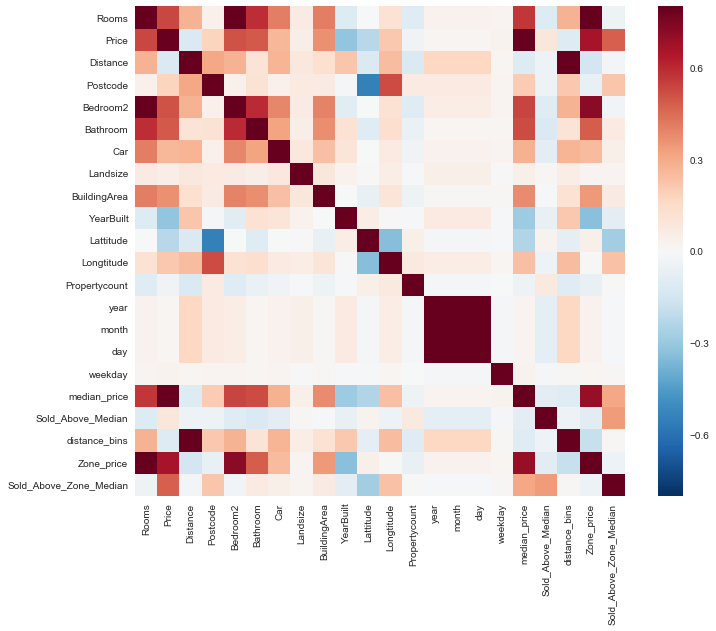

In [21]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);